# **Lasso Regression for Random Data**

This Jupyter Notebook generates a random linear dataset with Gaussian noise added to the following equation: y = 5 + 2X<sub>1</sub>. It employs the [numpy.random.rand()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) function from the [NumPy](https://numpy.org/) library to generate random noise. Then, this code uses the [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) class from the
 [Scikit-Learn](https://scikit-learn.org/stable/) library
([Pedregosa et al., 2011](https://doi.org/10.48550/arXiv.1201.0490)) to
build a regression model for this toy dataset. The following code is similar to Jupyter Notebooks discussed by
[Géron, 2023](https://www.isbns.net/isbn/9781098125974/).
<br> </br>
<img src="https://drive.usercontent.google.com/download?id=1A_dBySZp5D0JPTeK9p-ggP1wfTSzCTaC&export=view&authuser=0" height=200 alt="Dice">
<br><i>This image shows a pair of dice as an analogy of random data. Image source: Pixabay: https://pixabay.com/pt/vectors/dados-jogos-jogatina-cubos-n%C3%BAmeros-160005/</i></br>
<br> </br>
**References**
<br> </br>
Géron, A. Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow 3e: Concepts, Tools, and Techniques to Build Intelligent Systems, 3rd ed.; O’Reilly Media: Sebastopol, CA, 2023.
[ISBN: 978-1-098-12597-4](https://www.isbns.net/isbn/9781098125974/)
<br> </br>
Pedregosa F, Varoquaux G, Gramfort A, Michel V, Thirion B, Grisel O, Blondel M, Prettenhofer P, Weiss R, Dubourg V, Verplas J, Passos A, Cournapeau D, Brucher M, Perrot M, Duchesnay E. Scikitlearn: Machine Learning in Python. J Mach Learn Res., 2011; 12:2825–2830.
[DOI: 10.48550/arXiv.1201.0490](https://doi.org/10.48550/arXiv.1201.0490)
<br> </br>
It follows the complete Python code.


Generating and plotting random linear data......done!

Generating Lasso regression models and plotting them......

Model 1: [5.57707549 1.93915383] MSE: 0.0882


Model 2: [6.21476457 1.62170981] MSE: 0.2627


Model 3: [9.04893826 0.21084751] MSE: 4.4953
done!


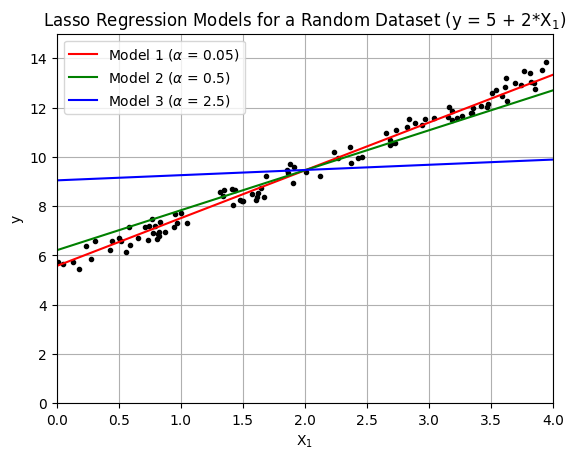

In [ ]:
#!/usr/bin/env python3
#
################################################################################
# Dr. Walter F. de Azevedo, Jr.                                                #
# [Scopus](https://www.scopus.com/authid/detail.uri?authorId=7006435557)       #
# [GitHub](https://github.com/azevedolab)                                      #
# July 20, 2024                                                                #
################################################################################
#
################################################################################
# Import section                                                               #
################################################################################
import numpy as np
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

################################################################################
# Randomly generated linear dataset                                            #
################################################################################
msg_out = "\nGenerating and plotting random linear data..."
print(msg_out,end="...")
np.random.seed(1123581321)          # Set up a random seed
X = 4*np.random.rand(100,1)
y = 5 + np.random.rand(100,1) + 2*X
X_b = np.c_[np.ones((100,1)), X]    # Add x0 = 1 to each instance

# Plotting randomly generated linear dataset
plt.title("Randomly Generated Linear Dataset (y = 5 + 2*X$_1$)")
plt.plot(X,y,".", color = "black")
plt.xlabel("X$_{1}$")
plt.ylabel("y")
plt.axis([0,4,0,15])
plt.grid()
plt.savefig("random_data.pdf",dpi=1500)
plt.close()
print("done!")

################################################################################
# Generate a Lasso regression model                                            #
################################################################################
msg_out = "\nGenerating Lasso regression models and plotting them..."
print(msg_out,end="...")

# Initial plotting
plt.title("Lasso Regression Models for a Random Dataset (y = 5 + 2*X$_1$)")
plt.plot(X,y,".", color = "black")
plt.xlabel("X$_{1}$")
plt.ylabel("y")
plt.axis([0,4,0,15])
plt.grid()

# Generate regression models and plot them
# Set up an new array for predictions
X_in = np.array([[0],[4]])
X_in_b = np.c_[np.ones((2,1)), X_in] # Add x0 = 1 to each instance

# Set up string and lists for regression models
alpha_lst = [0.05,0.5,2.5]
color_lst = ["red","green","blue"]

# Looping through regression models
for i,a in enumerate(alpha_lst):

    # Regresion
    lin_reg = Lasso(alpha = a)
    lin_reg.fit(X,y)

    # Prediction
    theta_vector = np.array([lin_reg.intercept_[0],lin_reg.coef_[0]])
    y_predict = X_in_b.dot(theta_vector)

    # Plotting
    plt.plot(X_in,y_predict, "-", color = color_lst[i],
                    label = "Model "+str(i+1)+" ($\\alpha$ = "+str(a)+")")
    plt.legend()

    # Prediction for metrics
    y_predict = X_b.dot(theta_vector)

    # Calculate MSE
    print("\n\nModel "+str(i+1)+":",theta_vector, end = " ")
    print("MSE: {:.4f}".format(mean_squared_error(y, y_predict)))

# Save plot
plt.savefig("lasso_regression_5_plus_2x.pdf",dpi=1500)
print("done!")
###############################################################################